In [2]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
df=pd.read_csv('../raw_data/confirmed_cases.csv')

df.head()

,Unnamed: 0,country_code,country_name,region_code,region_name,jurisdiction,01Jan2020,02Jan2020,03Jan2020,04Jan2020,...,27Aug2022,28Aug2022,29Aug2022,30Aug2022,31Aug2022,01Sep2022,02Sep2022,03Sep2022,04Sep2022,05Sep2022
0,1,ABW,Aruba,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,42750.0,42750.0,42792.0,42792.0,42848.0,42848.0,42848.0,42848.0,42848.0,42848.0
1,2,AFG,Afghanistan,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,191967.0,192463.0,192906.0,193004.0,193250.0,193520.0,193520.0,193912.0,193912.0,193912.0
2,3,AGO,Angola,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0
3,4,ALB,Albania,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,328299.0,328515.0,328571.0,329017.0,329352.0,329615.0,329862.0,330062.0,330062.0,330062.0
4,5,AND,Andorra,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0


In [4]:
df1=df.drop(columns=['country_name','region_code','region_name','jurisdiction','Unnamed: 0'])

In [5]:
df1=df1.groupby('country_code').agg('sum')
df1.head()

,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,09Jan2020,10Jan2020,...,27Aug2022,28Aug2022,29Aug2022,30Aug2022,31Aug2022,01Sep2022,02Sep2022,03Sep2022,04Sep2022,05Sep2022
country_code,,,,,,,,,,,,,,,,,,,,,
ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42750.0,42750.0,42792.0,42792.0,42848.0,42848.0,42848.0,42848.0,42848.0,42848.0
AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,191967.0,192463.0,192906.0,193004.0,193250.0,193520.0,193520.0,193912.0,193912.0,193912.0
AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0
ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,328299.0,328515.0,328571.0,329017.0,329352.0,329615.0,329862.0,330062.0,330062.0,330062.0
AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0


In [6]:

df1 = df1.transpose()
df1.columns.name = 'Dates'

In [7]:
df1.isna().count()

Dates
ABW    979
AFG    979
AGO    979
ALB    979
AND    979
      ... 
VUT    979
YEM    979
ZAF    979
ZMB    979
ZWE    979
Length: 187, dtype: int64

In [8]:
df1.head()

Dates,ABW,AFG,AGO,ALB,AND,ARE,ARG,AUS,AUT,AZE,...,USA,UZB,VEN,VIR,VNM,VUT,YEM,ZAF,ZMB,ZWE
01Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df2=df1.fillna(0)
df2.index = pd.to_datetime(df2.index)
df2.head()

Dates,ABW,AFG,AGO,ALB,AND,ARE,ARG,AUS,AUT,AZE,...,USA,UZB,VEN,VIR,VNM,VUT,YEM,ZAF,ZMB,ZWE
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 1440x720 with 0 Axes>

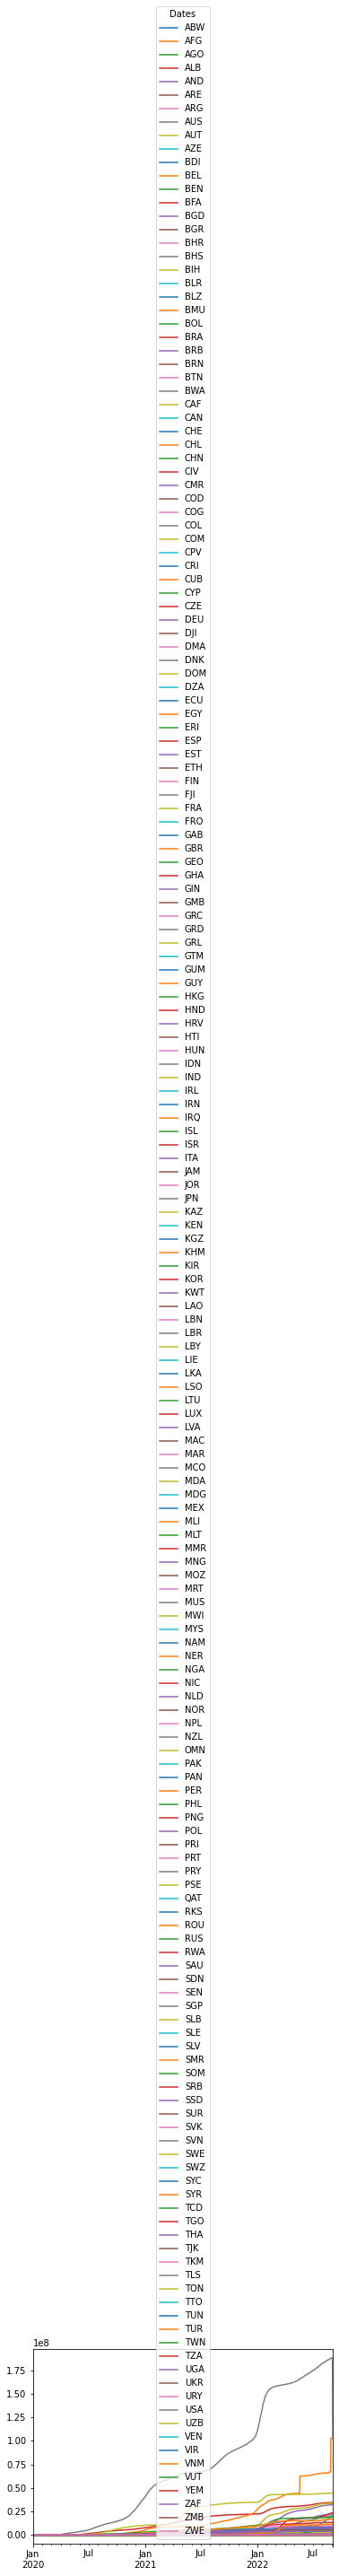

In [10]:
plt.figure(figsize=(20,10))
df2.plot();

Text(0.5, 0, 'Date')

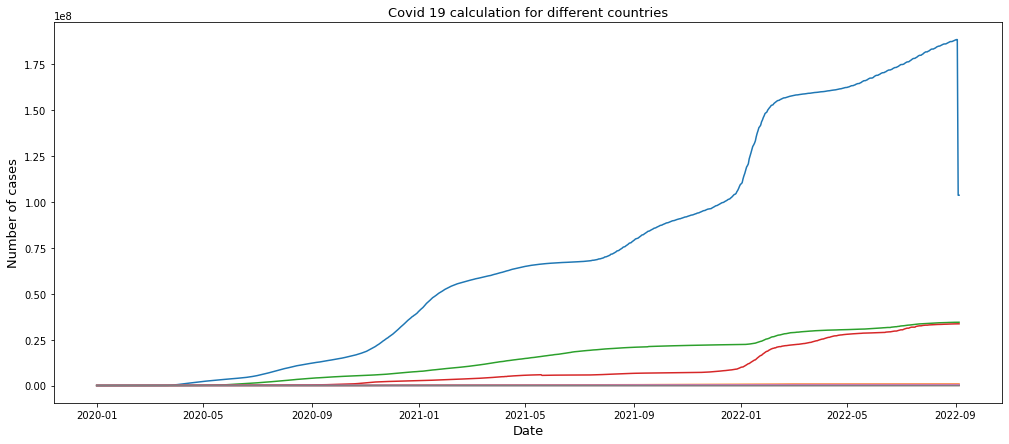

In [11]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(df2[['USA','AZE','BRA','FRA','MLT','LSO','LBY','MAC']]);
ax.set_title("Covid 19 calculation for different countries", size=13)
ax.set_ylabel("Number of cases", size=13)
ax.set_xlabel("Date", size=13)

In [12]:
df3=df2['USA']

In [13]:
df3

2020-01-01            0.0
2020-01-02            0.0
2020-01-03            0.0
2020-01-04            0.0
2020-01-05            0.0
                 ...     
2022-09-01    188271143.0
2022-09-02    188434370.0
2022-09-03    188451479.0
2022-09-04    103658521.0
2022-09-05    103658521.0
Name: USA, Length: 979, dtype: float64

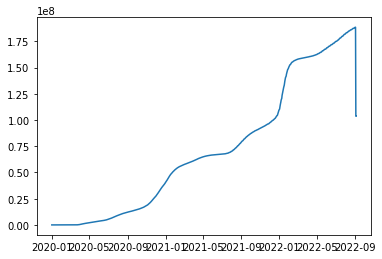

In [14]:
plt.plot(df2['USA'])


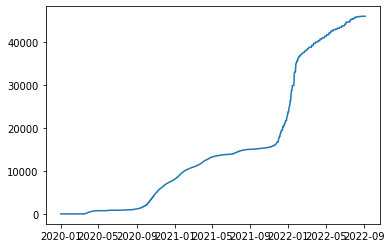

In [15]:
plt.plot(df2['AND'])

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_add = seasonal_decompose(df2["USA"], model="additive")

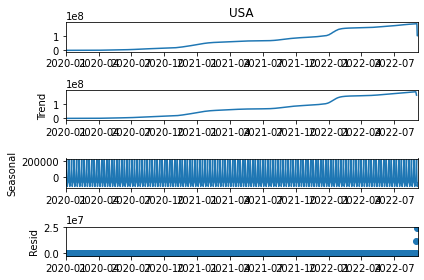

In [17]:
decomp_add.plot();

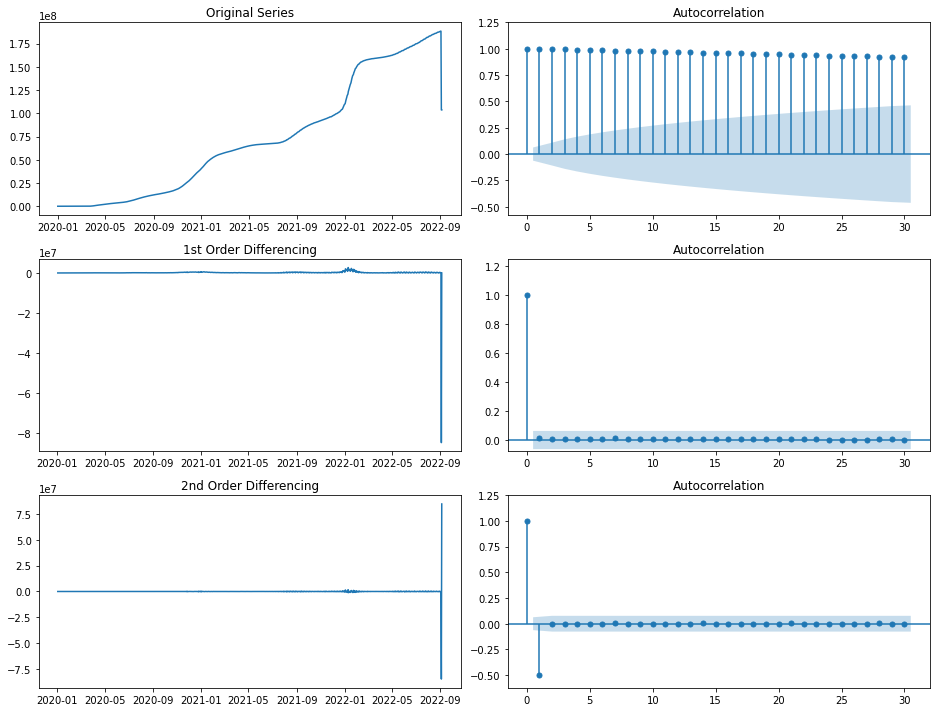

In [18]:
y=df2['USA']
fig, axes = plt.subplots(3, 2, figsize=(13,10))
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, auto_ylims=True,ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), auto_ylims=True,ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y.diff().diff().dropna(), auto_ylims=True, ax=axes[2, 1])

plt.tight_layout()

In [19]:
df.head()

,Unnamed: 0,country_code,country_name,region_code,region_name,jurisdiction,01Jan2020,02Jan2020,03Jan2020,04Jan2020,...,27Aug2022,28Aug2022,29Aug2022,30Aug2022,31Aug2022,01Sep2022,02Sep2022,03Sep2022,04Sep2022,05Sep2022
0,1,ABW,Aruba,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,42750.0,42750.0,42792.0,42792.0,42848.0,42848.0,42848.0,42848.0,42848.0,42848.0
1,2,AFG,Afghanistan,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,191967.0,192463.0,192906.0,193004.0,193250.0,193520.0,193520.0,193912.0,193912.0,193912.0
2,3,AGO,Angola,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0
3,4,ALB,Albania,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,328299.0,328515.0,328571.0,329017.0,329352.0,329615.0,329862.0,330062.0,330062.0,330062.0
4,5,AND,Andorra,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0


In [20]:
df_usa=df[df['country_code']=='USA']

In [21]:
df_usa.head()

,Unnamed: 0,country_code,country_name,region_code,region_name,jurisdiction,01Jan2020,02Jan2020,03Jan2020,04Jan2020,...,27Aug2022,28Aug2022,29Aug2022,30Aug2022,31Aug2022,01Sep2022,02Sep2022,03Sep2022,04Sep2022,05Sep2022
202,203,USA,United States,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,94197793.0,94204626.0,94306725.0,94378287.0,94531854.0,94650029.0,94732814.0,94742293.0,94742293.0,94742293.0
203,204,USA,United States,US_AK,Alaska,STATE_TOTAL,NaN,NaN,NaN,NaN,...,293076.0,293076.0,293076.0,293076.0,294498.0,294498.0,294498.0,294498.0,174828.0,174828.0
204,205,USA,United States,US_AL,Alabama,STATE_TOTAL,NaN,NaN,NaN,NaN,...,1479605.0,1479605.0,1479605.0,1479605.0,1479605.0,1494300.0,1494300.0,1494300.0,174828.0,174828.0
205,206,USA,United States,US_AR,Arkansas,STATE_TOTAL,NaN,NaN,NaN,NaN,...,929156.0,929608.0,930076.0,931459.0,932639.0,933962.0,935181.0,936005.0,174828.0,174828.0
206,207,USA,United States,US_AZ,Arizona,STATE_TOTAL,NaN,NaN,NaN,NaN,...,2245713.0,2245713.0,2245713.0,2245713.0,2254374.0,2254374.0,2254374.0,2254374.0,174828.0,174828.0


In [22]:
df_usa=df_usa.drop(columns=['country_name','region_name','jurisdiction','Unnamed: 0','country_code'])

In [23]:
df_usa=df_usa.set_index('region_code')

In [24]:
df_usa = df_usa.transpose()

In [25]:
df_usa.head()

region_code,NaN,US_AK,US_AL,US_AR,US_AZ,US_CA,US_CO,US_CT,US_DC,US_DE,...,US_SD,US_TN,US_TX,US_UT,US_VA,US_VT,US_WA,US_WI,US_WV,US_WY
01Jan2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02Jan2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03Jan2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04Jan2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Jan2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_usa.index = pd.to_datetime(df_usa.index)
df_usa=df_usa.fillna(0)

In [27]:
df_usa.head()

region_code,NaN,US_AK,US_AL,US_AR,US_AZ,US_CA,US_CO,US_CT,US_DC,US_DE,...,US_SD,US_TN,US_TX,US_UT,US_VA,US_VT,US_WA,US_WI,US_WV,US_WY
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'Date')

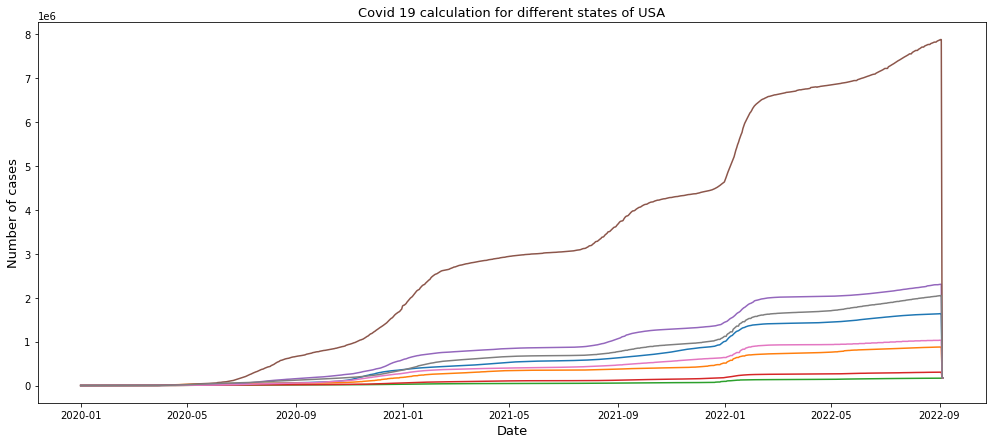

In [28]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(df_usa[['US_CO','US_CT','US_DC','US_DE','US_TN','US_TX','US_UT','US_VA']])
ax.set_title("Covid 19 calculation for different states of USA", size=13)
ax.set_ylabel("Number of cases", size=13)
ax.set_xlabel("Date", size=13)

In [29]:
y2=df_usa['US_AK']
y2.diff()
y2.diff().diff()

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         0.0
2020-01-04         0.0
2020-01-05         0.0
                ...   
2022-09-01     -1422.0
2022-09-02         0.0
2022-09-03         0.0
2022-09-04   -119670.0
2022-09-05    119670.0
Name: US_AK, Length: 979, dtype: float64

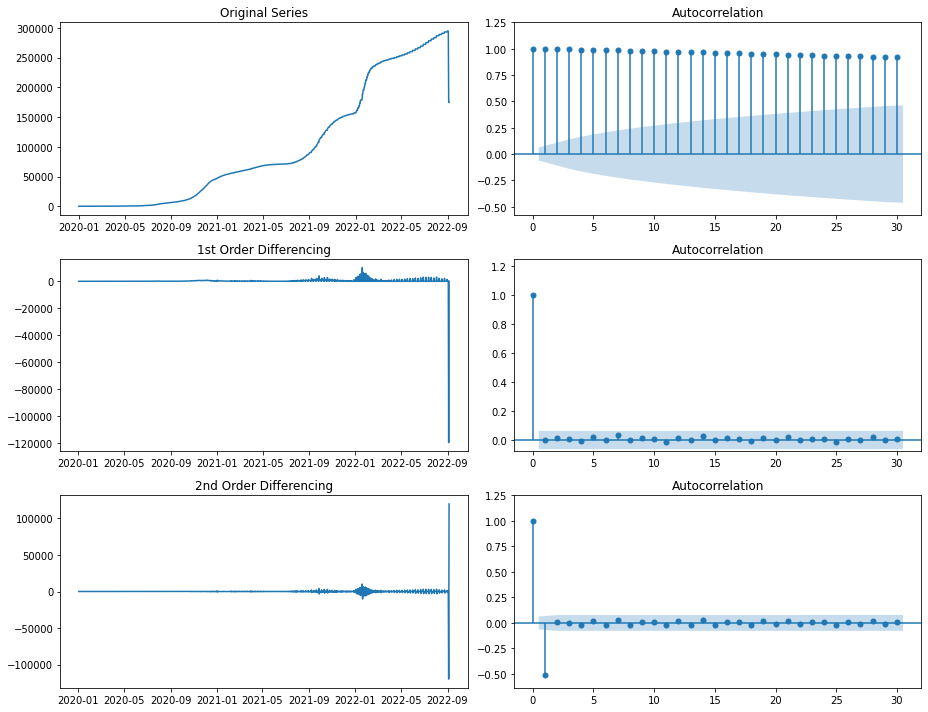

In [30]:
# Original Series
fig, axes = plt.subplots(3, 2, figsize=(13,10))
axes[0, 0].plot(y2); axes[0, 0].set_title('Original Series')
plot_acf(y2, auto_ylims=True,ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y2.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y2.diff().dropna(), auto_ylims=True,ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y2.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y2.diff().diff().dropna(), auto_ylims=True, ax=axes[2, 1])

plt.tight_layout()

## Arima model

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# 1. initialize the model
arima = ARIMA(y, order=(1, 1, 2), trend='t')

# 2. fit the models
arima = arima.fit()

arima.summary()

/Users/tekyteka/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tekyteka/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tekyteka/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    USA   No. Observations:                  979
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -15878.310
Date:                Tue, 06 Sep 2022   AIC                          31766.620
Time:                        19:05:30   BIC                          31791.047
Sample:                    01-01-2020   HQIC                         31775.914
                         - 09-05-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           1.06e+05   7.07e+05      0.150      0.881   -1.28e+06    1.49e+06
ar.L1          0.5991      1.448      0.414      0.679      -2.239       3.438
ma.L1         -0.5957      1.443     -0.413      0.680      -3.423       2.232
ma.L2          0.7449      0.818      0.910      0.363      -0.859       2.349
sigma2      7.473e+12     10.740   6.96e+11      0.000    7.47e+12    7.47e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          38078765.71
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):           20267.42   Skew:                           -31.02
Prob(H) (two-sided):                  0.00   Kurtosis:                       967.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.76e+25. Standard errors may be unstable.
"""

In [32]:
y

2020-01-01            0.0
2020-01-02            0.0
2020-01-03            0.0
2020-01-04            0.0
2020-01-05            0.0
                 ...     
2022-09-01    188271143.0
2022-09-02    188434370.0
2022-09-03    188451479.0
2022-09-04    103658521.0
2022-09-05    103658521.0
Name: USA, Length: 979, dtype: float64

## prediction plot

In [33]:
from statsmodels.graphics.tsaplots import plot_predict

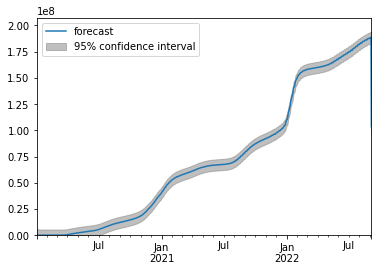

In [34]:
# Actual vs Fitted
plot_predict(arima, start=1, dynamic=False);
plt.ylim((.9 * y.min(), 1.1 * y.max()));

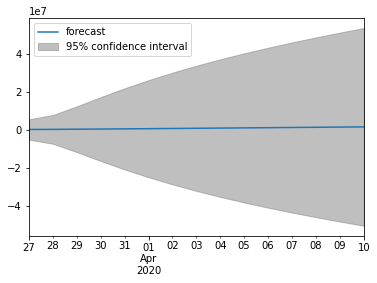

In [35]:
plot_predict(arima, start=86, end=100, dynamic=True)
plt.legend(loc='upper left');

In [36]:
y_train = y[200:800]
y_test = y[800:]
y_train

2020-07-19      7532060.0
2020-07-20      7653615.0
2020-07-21      7790003.0
2020-07-22      7924844.0
2020-07-23      8060222.0
                 ...     
2022-03-06    158329313.0
2022-03-07    158444266.0
2022-03-08    158502776.0
2022-03-09    158576370.0
2022-03-10    158667492.0
Name: USA, Length: 600, dtype: float64

In [37]:
y_test

2022-03-11    158764480.0
2022-03-12    158785183.0
2022-03-13    158807444.0
2022-03-14    158876179.0
2022-03-15    158922837.0
                 ...     
2022-09-01    188271143.0
2022-09-02    188434370.0
2022-09-03    188451479.0
2022-09-04    103658521.0
2022-09-05    103658521.0
Name: USA, Length: 179, dtype: float64

In [38]:
arima = ARIMA(y_train, order=(1, 1, 2), trend='t').fit()

/Users/tekyteka/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tekyteka/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tekyteka/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [39]:
forecast_results = arima.forecast(15, alpha=0.05)
forecast_results

2022-03-11    1.588119e+08
2022-03-12    1.589627e+08
2022-03-13    1.591199e+08
2022-03-14    1.592831e+08
2022-03-15    1.594520e+08
2022-03-16    1.596261e+08
2022-03-17    1.598052e+08
2022-03-18    1.599889e+08
2022-03-19    1.601769e+08
2022-03-20    1.603691e+08
2022-03-21    1.605650e+08
2022-03-22    1.607645e+08
2022-03-23    1.609673e+08
2022-03-24    1.611733e+08
2022-03-25    1.613822e+08
Freq: D, Name: predicted_mean, dtype: float64

In [40]:
forecast_results-y_test


2022-03-11     47441.140178
2022-03-12    177510.296595
2022-03-13    312445.921229
2022-03-14    406925.538935
2022-03-15    529119.392188
                  ...      
2022-09-01              NaN
2022-09-02              NaN
2022-09-03              NaN
2022-09-04              NaN
2022-09-05              NaN
Length: 179, dtype: float64

In [41]:
# forecast = arima.forecast(15, alpha=0.05)
conf_int = pd.DataFrame(forecast_results.conf_int().values, columns=['low', 'high'])

AttributeError: 'Series' object has no attribute 'conf_int'

In [42]:
plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='grey', ls='--')
plt.plot(conf_int['high'], label='high', c='grey', ls='--')
plt.legend();

NameError: name 'forecast' is not defined